In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten

import joblib
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('archive/output.csv')
df

Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0         1   M     43.2555       30.8421      25.9025   6.3     Yes
1         2   F     45.6033       28.1900      26.2067  13.5      No
2         3  F      45.0107       28.9677      26.0215  11.7      No
3         4   F     44.5398       28.9899      26.4703  13.5      No
4         5  M      43.2870       30.6972      26.0158  12.4      No
..      ...  ..         ...           ...          ...   ...     ...
99      100  F      49.9999       29.2860      20.7141  14.5     Yes
100     101  M      42.2324       30.6757      27.0919   6.3     Yes
101     102   F     45.6064       31.9084      22.4852  12.7      No
102     103  M      45.2095       29.2769      25.5136  13.4      No
103     104   F     43.5706       29.8094      26.6199  12.2      No

[104 rows x 7 columns]

In [4]:
df['Sex'].value_counts()

M     29
M     26
F     26
F     23
Name: Sex, dtype: int64

In [5]:
df.describe()

Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std     30.166206    2.816294      1.554275     1.984671    2.512957
min      1.000000   38.796800     25.140300    19.541300    2.800000
25%     26.750000   43.911375     27.871300    24.896425   10.650000
50%     52.500000   45.385350     28.948750    25.953200   12.600000
75%     78.250000   46.968325     29.887275    26.721600   14.000000
max    104.000000   54.647800     32.368100    29.841400   16.300000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
Number          104 non-null int64
Sex             104 non-null object
%Red Pixel      104 non-null float64
%Green pixel    104 non-null float64
%Blue pixel     104 non-null float64
Hb              104 non-null float64
Anaemic         104 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [7]:
df['Sex'].value_counts()

M     29
M     26
F     26
F     23
Name: Sex, dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
99     False
100    False
101    False
102    False
103    False
Length: 104, dtype: bool

In [9]:
le=LabelEncoder()
df['Anaemic']=le.fit_transform(df['Anaemic'])
df['Sex'] = le.fit_transform(df['Sex'])
df

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0         1    2     43.2555       30.8421      25.9025   6.3        1
1         2    0     45.6033       28.1900      26.2067  13.5        0
2         3    1     45.0107       28.9677      26.0215  11.7        0
3         4    0     44.5398       28.9899      26.4703  13.5        0
4         5    3     43.2870       30.6972      26.0158  12.4        0
..      ...  ...         ...           ...          ...   ...      ...
99      100    1     49.9999       29.2860      20.7141  14.5        1
100     101    3     42.2324       30.6757      27.0919   6.3        1
101     102    0     45.6064       31.9084      22.4852  12.7        0
102     103    3     45.2095       29.2769      25.5136  13.4        0
103     104    0     43.5706       29.8094      26.6199  12.2        0

[104 rows x 7 columns]

In [10]:
from sklearn.utils import resample
number_of_samples=500
df=resample(df, replace=True, n_samples=number_of_samples, random_state=30)
df

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
37      38    2     47.2275       28.2526      24.5199  12.8        0
37      38    2     47.2275       28.2526      24.5199  12.8        0
45      46    3     46.9428       27.2219      25.8353  13.3        0
45      46    3     46.9428       27.2219      25.8353  13.3        0
12      13    0     44.9642       30.5279      24.5079   4.8        1
..     ...  ...         ...           ...          ...   ...      ...
64      65    1     38.7968       31.3618      29.8414   8.5        1
69      70    1     46.9597       28.4993      24.5410   8.4        1
44      45    2     44.1868       28.9764      26.8368  14.1        0
43      44    3     44.9526       28.4671      26.5803  13.1        0
97      98    2     48.3681       26.9220      24.7099  12.5        0

[500 rows x 7 columns]

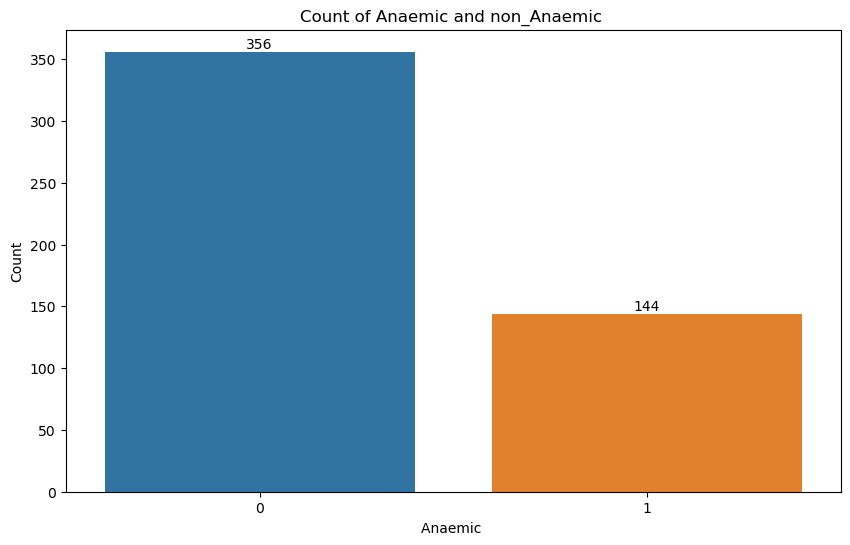

In [11]:
category_order = ['0','1']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Anaemic')
plt.xlabel('Anaemic ')
ax.set_xticklabels(category_order)
plt.ylabel('Count')
plt.title('Count of Anaemic and non_Anaemic ')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [14]:
labels=['0','1']
precision = []
recall = []
fscore = []
accuracy = []

In [31]:
def calculateMetrics(algorithm, predict, testY):
    global labels
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

model loaded successfully
GradientBoostingClassifier Accuracy    : 100.0
GradientBoostingClassifier Precision   : 100.0
GradientBoostingClassifier Recall      : 100.0
GradientBoostingClassifier FSCORE      : 100.0

 GradientBoostingClassifier classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



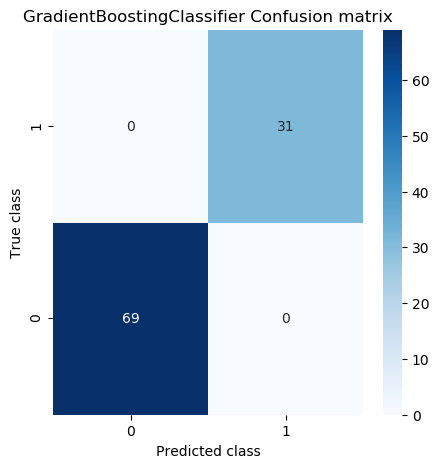

In [16]:
if os.path.exists('GradientBoostingClassifier.pkl'):
    #load the model:
    GBC=joblib.load('GradientBoostingClassifier.pkl')
    print('model loaded successfully')
    predict=GBC.predict(x_test)
    calculateMetrics("GradientBoostingClassifier",predict,y_test)
else:
    #train the model:
    GBC=GradientBoostingClassifier()
    GBC.fit(x_train,y_train)
    #saving model:
    joblib.dump(GBC,'GradientBoostingClassifier.pkl')
    print('model saved successfully')
    predict=GBC.predict(x_test)
    calculateMetrics("GradientBoostingClassifier",predict,y_test)

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6,)))
model.add(Dense(32, activation='relu'))  # You will extract features from this layer
model.add(Dense(3, activation='softmax'))  # Final output layer (for classification)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the DNN
model.fit(x_train, y_train, epochs=50, verbose=0)

# Step 2: Feature extraction using the trained DNN (extracting the output from the second-to-last layer)
extractor = Sequential(model.layers[:-1])  # Remove the output layer for feature extraction
X_train_features = extractor.predict(x_train)
X_test_features = extractor.predict(x_test)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_features, y_train)


# Step 4: Make predictions on test data and evaluate
y_pred = rfc.predict(X_test_features)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Random Forest Classifier Accuracy: 100.00%


In [18]:
print(tf.shape)

<function shape at 0x000001294933F828>


In [19]:
df.iloc[:10,:]

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
37      38    2     47.2275       28.2526      24.5199  12.8        0
37      38    2     47.2275       28.2526      24.5199  12.8        0
45      46    3     46.9428       27.2219      25.8353  13.3        0
45      46    3     46.9428       27.2219      25.8353  13.3        0
12      13    0     44.9642       30.5279      24.5079   4.8        1
23      24    1     47.6372       26.7953      25.5675  15.1        0
2        3    1     45.0107       28.9677      26.0215  11.7        0
53      54    1     47.1003       28.3195      24.5801  12.4        0
17      18    0     44.0957       29.9973      25.9070   8.3        1
46      47    2     48.8523       26.2003      24.9474  14.1        0

In [20]:
temp=df.iloc[20:30,:]

In [21]:
temp_test=temp.iloc[:,:-1]
print(temp_test)

     Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb
102     103    3     45.2095       29.2769      25.5136  13.4
76       77    0     49.5899       28.9754      21.4347   9.9
16       17    0     42.5358       30.1604      27.3039  10.0
6         7    0     43.1457       30.1628      26.6915   8.6
62       63    1     45.8483       27.2043      26.9474  15.5
27       28    2     44.3297       28.7617      26.9086  14.1
46       47    2     48.8523       26.2003      24.9474  14.1
45       46    3     46.9428       27.2219      25.8353  13.3
64       65    1     38.7968       31.3618      29.8414   8.5
62       63    1     45.8483       27.2043      26.9474  15.5


In [22]:
temp_op=temp.iloc[:,-1]
arr=np.array(temp_op)
print(temp_op)
arr

102    0
76     1
16     1
6      1
62     0
27     0
46     0
45     0
64     1
62     0
Name: Anaemic, dtype: int32


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [23]:
predicted_data=GBC.predict(temp_test)
print(predicted_data)
print(arr)

[0 1 1 1 0 0 0 0 1 0]
[0 1 1 1 0 0 0 0 1 0]


In [24]:
random_sample=df.sample(n=100,random_state=1)
random_sample_path='test.csv'
random_sample.to_csv(random_sample_path,index=False)

In [25]:
t=pd.read_csv('test.csv')
t

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  Anaemic
0       56    3     46.2133       28.3358      25.4509  13.0        0
1       45    2     44.1868       28.9764      26.8368  14.1        0
2       76    2     53.9113       26.3455      19.7433  14.5        0
3       94    3     47.7549       26.2457      25.9994  15.2        0
4       26    3     43.4098       31.2315      25.3586  12.9        0
..     ...  ...         ...           ...          ...   ...      ...
95      42    2     47.9777       26.7981      25.2242  16.3        0
96       5    3     43.2870       30.6972      26.0158  12.4        0
97      59    3     40.6395       32.1891      27.1714   2.8        1
98       6    2     45.0994       27.9645      26.9361  16.2        0
99      52    2     44.0418       28.5164      27.4418  11.9        0

[100 rows x 7 columns]

In [26]:
test=t.drop(['Anaemic'], axis=1)
test

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb
0       56    3     46.2133       28.3358      25.4509  13.0
1       45    2     44.1868       28.9764      26.8368  14.1
2       76    2     53.9113       26.3455      19.7433  14.5
3       94    3     47.7549       26.2457      25.9994  15.2
4       26    3     43.4098       31.2315      25.3586  12.9
..     ...  ...         ...           ...          ...   ...
95      42    2     47.9777       26.7981      25.2242  16.3
96       5    3     43.2870       30.6972      26.0158  12.4
97      59    3     40.6395       32.1891      27.1714   2.8
98       6    2     45.0994       27.9645      26.9361  16.2
99      52    2     44.0418       28.5164      27.4418  11.9

[100 rows x 6 columns]

In [27]:
p=GBC.predict(test)

In [28]:
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [29]:
test['predicted']=p
test

Number  Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb  predicted
0       56    3     46.2133       28.3358      25.4509  13.0          0
1       45    2     44.1868       28.9764      26.8368  14.1          0
2       76    2     53.9113       26.3455      19.7433  14.5          0
3       94    3     47.7549       26.2457      25.9994  15.2          0
4       26    3     43.4098       31.2315      25.3586  12.9          0
..     ...  ...         ...           ...          ...   ...        ...
95      42    2     47.9777       26.7981      25.2242  16.3          0
96       5    3     43.2870       30.6972      26.0158  12.4          0
97      59    3     40.6395       32.1891      27.1714   2.8          1
98       6    2     45.0994       27.9645      26.9361  16.2          0
99      52    2     44.0418       28.5164      27.4418  11.9          0

[100 rows x 7 columns]